Implementação do modelo de designação com função objetivo Maximin, ou seja, maximizar o menor valor de alguma característica que estamos interessados.

Dada a tabela abaixo, queremos maximizar a menor satisfação de cada professor ministrar a disciplina com mais afinidade.


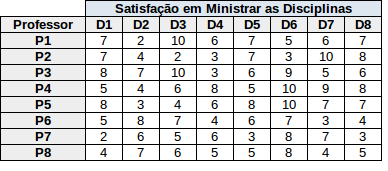


Índices
- i = 1, ..., m representa o professor i
- j = 1, ..., n representa a disciplina j

Parametro
- $p_{ij}$ satisfação do professor i em ministrar a disciplina j;
- $R$ menor satisfação

#### Variáveis
- $x_{ij}$ indica se o professor i irá ministrar a disciplina j (variável binária)
- $R$ corresponde a satisfação mínima

#### Função objetivo
$$
\max (R)
$$

#### Restrição de que todos os professores teram que ministrar apenas uma disciplina
$$
\sum_{j=1}^{n}x_{ij} =1, \;\; \forall i=1,...,m
$$

#### Restrição de que todas as disciplinas sejam ministradas por apenas um professor
$$
\sum_{i=1}^{m}x_{ij} = 1, \;\; \forall j=1,...,n
$$

#### Restrição que garante que R assumirá o valor da menor preferência
$$
\sum_{j=1}^{n}p_{ij}x_{ij} \geq R, \;\; \forall i=1, ..., m
$$


In [1]:
import gurobipy as gp

In [3]:
# Parametros
qtd_professores = 8
qtd_disciplinas = 8

# Satisfação do professor i em ministrar a disciplina j
vet_satisfacao = [[7, 2, 10, 6, 7, 5, 6, 7],
                  [7, 4, 2, 3, 7, 3, 10, 8],
                  [8, 7, 10, 3, 6, 9, 5, 6],
                  [5, 4, 6, 8, 5, 1, 9, 8],
                  [8, 3, 4, 6, 8, 1, 7, 7], 
                  [5, 8, 7, 4, 6, 7, 3, 4], 
                  [2, 6, 5, 6, 3, 8, 7, 3], 
                  [4, 7, 6, 5, 5, 8, 4, 5]]

# Rótulo dos professores
professores = [f'P_{i+1}' for i in range(qtd_professores)]

# Rótulo das disciplinas
disciplinas = [f'D_{i+1}' for i in range(qtd_disciplinas)]

# Dicionário de satisfação
satisfacao = { (professores[i], disciplinas[j]):vet_satisfacao[i][j] 
              for i in range(qtd_professores) for j in range(qtd_disciplinas)}

In [16]:
# Modelo
m = gp.Model()

# Variáveis
x = m.addVars(professores, disciplinas, vtype=gp.GRB.BINARY)
R = m.addVar()

# Função objetivo
m.setObjective(R, sense=gp.GRB.MAXIMIZE)

# Restrição de que todos os professores teram que ministrar apenas uma disciplina
c1 = m.addConstrs(
    x.sum(i, '*') == 1 for i in professores
)

# Restrição de que todas as disciplinas sejam ministradas por apenas um professor
c2 = m.addConstrs(
    x.sum('*', j) == 1 for j in disciplinas
)

# Restrição que garante que R assumirá o valor da menor preferência
c3 = m.addConstrs(
    x.prod(satisfacao, i, '*') >=  R for i in professores
)

# Executa
m.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (linux64)
Optimize a model with 24 rows, 65 columns and 200 nonzeros
Model fingerprint: 0x626902d3
Variable types: 1 continuous, 64 integer (64 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3.0000000
Presolve removed 0 rows and 5 columns
Presolve time: 0.31s
Presolved: 24 rows, 60 columns, 174 nonzeros
Variable types: 0 continuous, 60 integer (59 binary)

Root relaxation: objective 7.500000e+00, 46 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    7.50000    0   11    3.00000    7.50000   150%     -    0s
H    0     0                       6.0000000    7.50000  25.0%     -    0s
H    0     0                       7.0000000    7.50000  7.14%    

In [31]:
# Qual disciplina será ministrada por qual professor?
print('   ',*disciplinas)
for i in professores:
    print(f'{i} ', end=' ')
    for j in disciplinas:        
        print(f'{round(x[i,j].X)}   ',end='')
    print('')

    D_1 D_2 D_3 D_4 D_5 D_6 D_7 D_8
P_1  0   0   1   0   0   0   0   0   
P_2  0   0   0   0   0   0   0   1   
P_3  1   0   0   0   0   0   0   0   
P_4  0   0   0   1   0   0   0   0   
P_5  0   0   0   0   1   0   0   0   
P_6  0   1   0   0   0   0   0   0   
P_7  0   0   0   0   0   0   1   0   
P_8  0   0   0   0   0   1   0   0   


In [34]:
# Satisfação total e mínima
sats_total = x.prod(satisfacao).getValue()
print(f'Satisfação total: {round(sats_total)}')
print(f'Satisfação mínima: {round(R.X)}')

Satisfação total: 65
Satisfação mínima: 7


In [41]:
# Satisfação de cada professor
print('    ', 'Satisfação')
for i in range(qtd_professores):
    print(f'{professores[i]} ', end=' ')
    for j in range(qtd_disciplinas):
        if round(x[professores[i],disciplinas[j]].X) == 1:
            print(f'{vet_satisfacao[i][j]}   ',end='')
    print('')

     Satisfação
P_1  10   
P_2  8   
P_3  8   
P_4  8   
P_5  8   
P_6  8   
P_7  7   
P_8  8   
